# TensorFlow Workflow and Project Definition

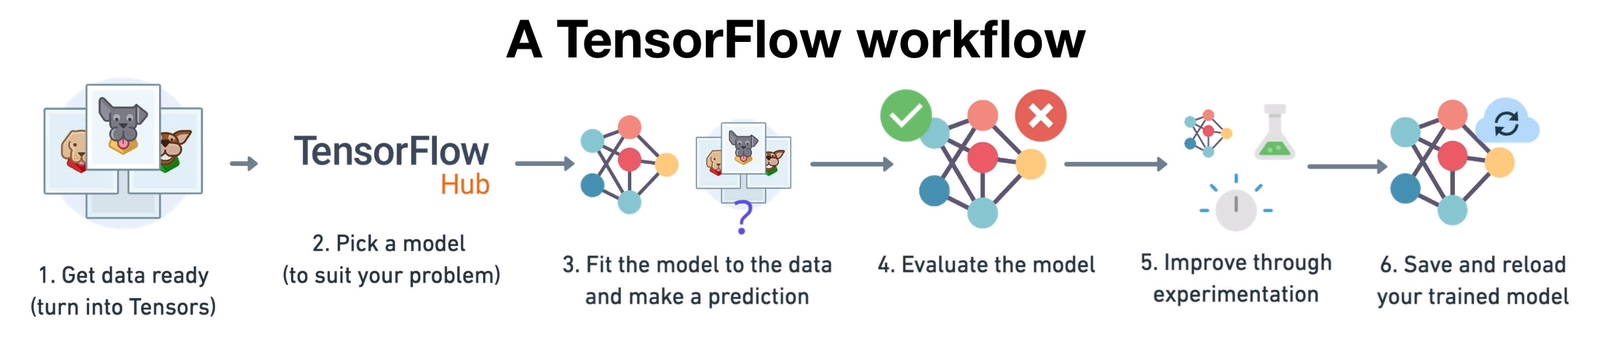

The dataset contains transactions made by credit cards in September 2013 by European cardholders. The goal of this project is to train a machine learning model to identify fraud transactions.

[Download Dataset](https://drive.google.com/file/d/1XUJNkff0T3R5mZbjqFiYGRki5oND8HFS/view?usp=sharing)

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

#0.Setting Up the Environment

In [ ]:
from tensorflow._api.v2.config.experimental import list_physical_devices
#importing necessary tools
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
print("TF Version:", tf.__version__)
print("hub Version:", hub.__version__)
#checking for gpu availability
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available" )
print(tf.config.get_visible_devices)

TF Version: 2.12.0
hub Version: 0.14.0
GPU not available
<function get_visible_devices at 0x7d3b956f8430>


#1.Getting data ready

In [ ]:
data_df = pd.read_csv('/content/drive/MyDrive/datasets/credit-card-Fraud/creditcard.csv')
data_df = data_df.drop_duplicates()
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data_df.shape

(283726, 31)

In [ ]:
print(data_df.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [ ]:
#observing each class fraud(1) and non fraud(0)
data_df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

## balancing the dataset
there should be almost equal of each type of class in the dataset

In [ ]:
#sepperating fraud and non fraud
fraud = data_df[data_df['Class'] == 1]
non_fraud = data_df[data_df['Class'] == 0]
fraud.shape, non_fraud.shape

((473, 31), (283253, 31))

In [ ]:
#random selection of samples
non_fraud_sample = non_fraud.sample(n=492)
fraud.shape, non_fraud_sample.shape

((473, 31), (492, 31))

In [ ]:
#merging datasets
dataset = fraud.append(non_fraud_sample, ignore_index = True)
print(dataset['Class'].value_counts())
dataset.head()

0    492
1    473
Name: Class, dtype: int64


<ipython-input-181-92d31eafdcd7>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = fraud.append(non_fraud_sample, ignore_index = True)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [ ]:
#sepperating feature and label datas
X = dataset.drop(labels = ['Class'], axis = 1)
Y = dataset['Class']

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [ ]:
Y = Y.to_numpy()

In [ ]:
print(f"{X.shape , Y.shape}")

((965, 30), (965,))


In [ ]:
#reshape the test data
X = X.reshape((965, 30, 1))

In [ ]:
print(X.shape)

(965, 30, 1)


In [ ]:
X_test, Y_test = X[:100], Y[:100]
#splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X[100:], Y[100:], test_size = 0.2, random_state = 0)

#2.choosing a model

In [ ]:
#making a model object
model = tf.keras.models.Sequential()
#adding first CNN layer
model.add(tf.keras.layers.Conv1D(filters = 32, kernel_size = 2 , padding = 'same', activation = 'relu', input_shape = (30, 1) ))
#Batch normalization
model.add(tf.keras.layers.BatchNormalization())
#adding maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size = 2))
#adding dropout layer
model.add(tf.keras.layers.Dropout(0.2))

#adding second CNN layer
model.add(tf.keras.layers.Conv1D(filters = 64, kernel_size = 2 , padding = 'same', activation = 'relu'))
#Batch normalization
model.add(tf.keras.layers.BatchNormalization())
#adding maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size = 2))
#adding dropout layer
model.add(tf.keras.layers.Dropout(0.3))

#adding flatten layer
model.add(tf.keras.layers.Flatten())
#fully connected dense layer
model.add(tf.keras.layers.Dense(units =64 , activation ='relu'))
#adding dropout layer
model.add(tf.keras.layers.Dropout(0.3))
#adding output layer
model.add(tf.keras.layers.Dense(units =1 , activation ='sigmoid'))

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 30, 32)            96        
                                                                 
 batch_normalization_12 (Bat  (None, 30, 32)           128       
 chNormalization)                                                
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 15, 32)           0         
 g1D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 15, 32)            0         
                                                                 
 conv1d_13 (Conv1D)          (None, 15, 64)            4160      
                                                                 
 batch_normalization_13 (Bat  (None, 15, 64)          

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer = adam,
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

#3.fit the data to the model and make predictions

In [ ]:
history = model.fit(X_train, Y_train, epochs = 25, validation_data=(X_val, Y_val))

Epoch 1/25
22/22 [==============================] - 2s 21ms/step - loss: 0.7698 - accuracy: 0.6156 - val_loss: 0.6791 - val_accuracy: 0.5896
Epoch 2/25
22/22 [==============================] - 0s 10ms/step - loss: 0.5859 - accuracy: 0.7399 - val_loss: 0.6472 - val_accuracy: 0.8382
Epoch 3/25
22/22 [==============================] - 0s 10ms/step - loss: 0.5059 - accuracy: 0.7919 - val_loss: 0.6188 - val_accuracy: 0.8728
Epoch 4/25
22/22 [==============================] - 0s 10ms/step - loss: 0.4426 - accuracy: 0.7991 - val_loss: 0.5924 - val_accuracy: 0.8613
Epoch 5/25
22/22 [==============================] - 0s 10ms/step - loss: 0.3965 - accuracy: 0.8425 - val_loss: 0.5635 - val_accuracy: 0.8671
Epoch 6/25
22/22 [==============================] - 0s 10ms/step - loss: 0.3847 - accuracy: 0.8454 - val_loss: 0.5363 - val_accuracy: 0.8728
Epoch 7/25
22/22 [==============================] - 0s 10ms/step - loss: 0.3557 - accuracy: 0.8642 - val_loss: 0.5099 - val_accuracy: 0.8786
Epoch 8/25
22

## making predictions

In [ ]:
Y_pred = model.predict(X_test)
pred_index = (Y_pred > 0.5).astype(int)

4/4 [==============================] - 0s 4ms/step


#4.evaluationg the model

## confusion matrix

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
CM = confusion_matrix(Y_test, pred_index)
CM

array([[ 0,  0],
       [10, 90]])

## learning curve

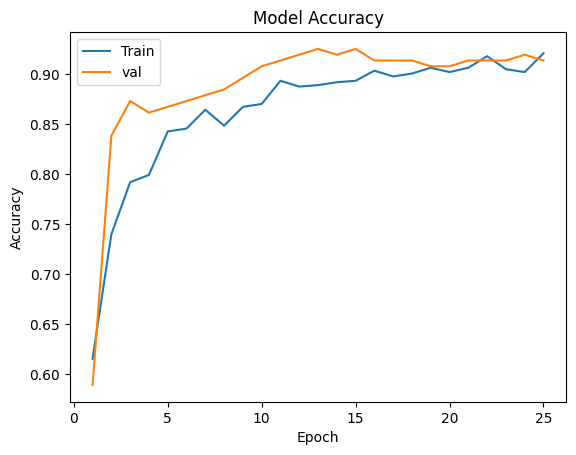

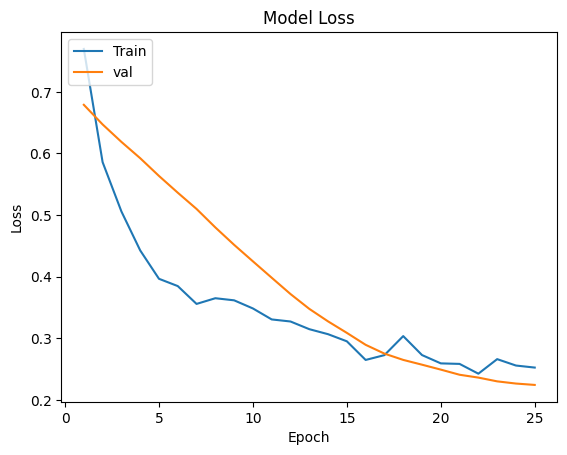

In [ ]:
#validation accuracy is acreasing as the training accuracy increases so model is not overfitted
#training loss in decreasing and the validation loss is also decreasing
learning_curve(history, 25)

## Gettin mode's score

In [ ]:
# creating a function to ease the evaluation of model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def evaluation_preds(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true , y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dic = { "accuracy" : round(accuracy, 2) ,
                  "precision" : round(precision, 2),
                  "recall" : round(recall, 2),
                  "f1" : round(f1, 2)}
    print(f"Accuracy: {accuracy * 100:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")

    return metric_dic

In [ ]:
evaluation_preds(Y_test, pred_index)

Accuracy: 90.00
Precision: 1.00
Recall: 0.90
F1: 0.95


{'accuracy': 0.9, 'precision': 1.0, 'recall': 0.9, 'f1': 0.95}

In [ ]:
accuracy_score(Y_test, pred_index)

0.9

# 5.Saving and loading the model

In [ ]:
import datetime
import os
def save_model(model, suffix=None):
  # Create a model directory pathname with current time
  modeldir = os.path.join("//content/drive/MyDrive/datasets/trainedModels", datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%s"))
  model_path = modeldir + "-" + suffix + ".h5"
  model.save(model_path)
  return model_path

In [ ]:
def load_model(model_path):
  print(f"Loading the saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path, custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Saving the model
save_model(model, suffix="trained_model")

'//content/drive/MyDrive/datasets/trainedModels/2023-09-02_06-30-1693636249-trained_model.h5'

In [ ]:
#loading the model
loaded_model = load_model("//content/drive/MyDrive/datasets/trainedModels/2023-09-02_01-14-1693617242-trained_model.h5")

Loading the saved model from: //content/drive/MyDrive/datasets/trainedModels/2023-09-02_01-14-1693617242-trained_model.h5
